# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [3]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 15.373s 


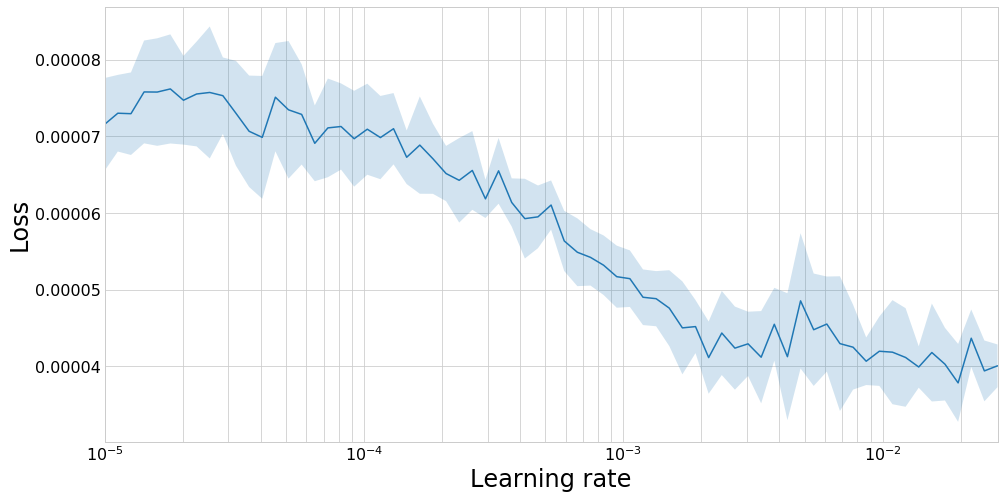

______________________________________



In [5]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [6]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':1, 'reverse':False, 'redux_decay':True, 'scale':25}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100359). Check your callbacks.
  % delta_t_median)


1 New best found: 3.540245798659308e-05
2 New best found: 3.380741616234334e-05
4 New best found: 3.3435896073502495e-05
5 New best found: 3.3156654174072285e-05
8 New best found: 3.274384758966166e-05
9 New best found: 3.243862570953555e-05
10 New best found: 3.2132144872817346e-05
11 New best found: 3.2098884370343684e-05
13 New best found: 3.206787975462559e-05
15 New best found: 3.193622854854022e-05
17 New best found: 3.19361879615831e-05
18 New best found: 3.172761215666868e-05
20 New best found: 3.165800799369669e-05
21 New best found: 3.165511141474231e-05
22 New best found: 3.163018516854125e-05
Saving snapshot 1
25 New best found: 3.162916755570697e-05
37 New best found: 3.157103592389373e-05
44 New best found: 3.153739461695709e-05
45 New best found: 3.14790401116913e-05
47 New best found: 3.1474114201980186e-05
48 New best found: 3.1460262569658345e-05
49 New best found: 3.1454014584632026e-05
Saving snapshot 2
65 New best found: 3.1446491018983946e-05
68 New best found: 3.

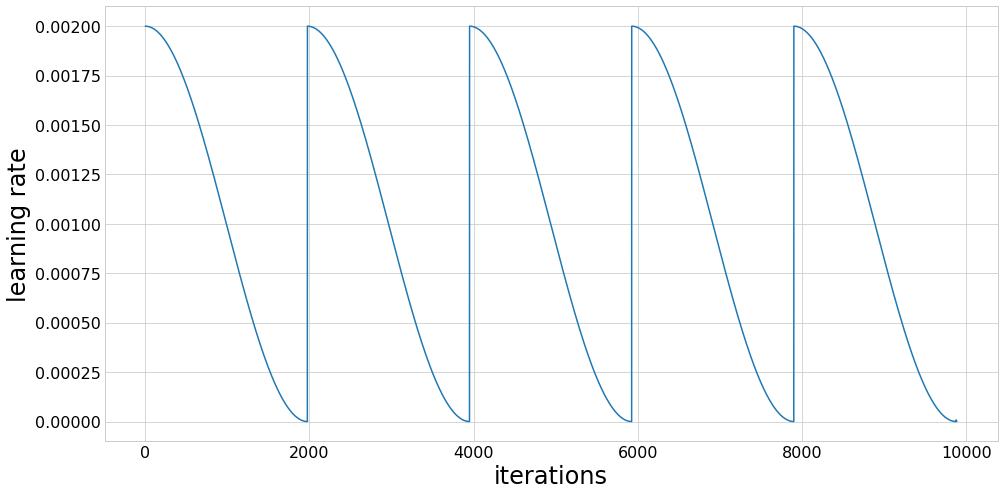

Fold took 107.679s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102051). Check your callbacks.
  % delta_t_median)


1 New best found: 3.5623848932470884e-05
2 New best found: 3.4244052482636705e-05
3 New best found: 3.3360209118691e-05
4 New best found: 3.329508775909965e-05
5 New best found: 3.259144938560027e-05
8 New best found: 3.245205119932785e-05
9 New best found: 3.238117269379013e-05
10 New best found: 3.212257574607946e-05
11 New best found: 3.19066891966119e-05
13 New best found: 3.176803835286046e-05
16 New best found: 3.162239766340813e-05
18 New best found: 3.160326212207604e-05
19 New best found: 3.1544419539611244e-05
21 New best found: 3.147177826408162e-05
23 New best found: 3.146594789491621e-05
24 New best found: 3.145652800673487e-05
Saving snapshot 1
25 New best found: 3.145402537749352e-05
39 New best found: 3.144841903335181e-05
41 New best found: 3.1373648465801685e-05
43 New best found: 3.1318488135180464e-05
44 New best found: 3.128425674000871e-05
48 New best found: 3.127249504456018e-05
Saving snapshot 2
68 New best found: 3.1255089654533104e-05
70 New best found: 3.1206

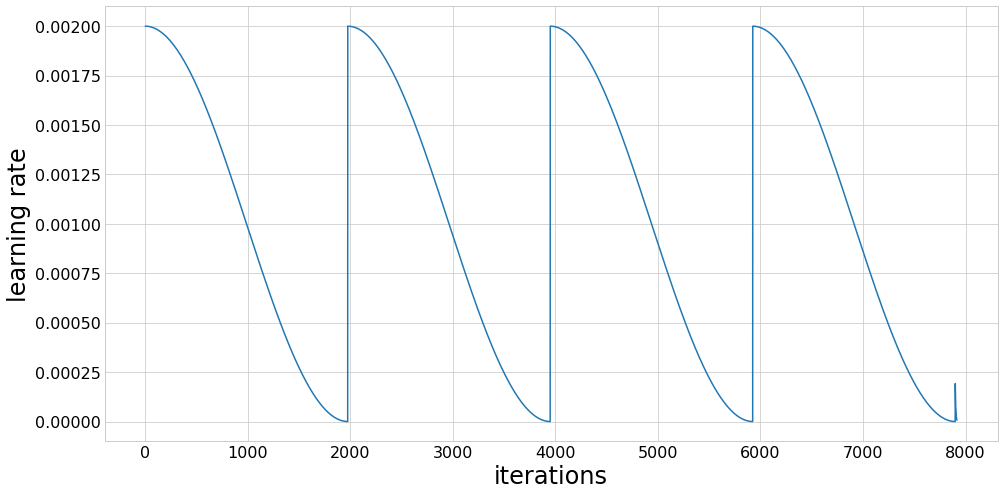

Fold took 93.856s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255528). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128142). Check your callbacks.
  % delta_t_median)


1 New best found: 3.567866671605397e-05
2 New best found: 3.428807373519548e-05
3 New best found: 3.36174927120798e-05
4 New best found: 3.334432271219805e-05
5 New best found: 3.317494051547544e-05
8 New best found: 3.280637087428847e-05
9 New best found: 3.2627369815076936e-05
12 New best found: 3.2494411306837247e-05
13 New best found: 3.2432231053788126e-05
14 New best found: 3.240396646483142e-05
15 New best found: 3.220066470640935e-05
16 New best found: 3.2123452134335184e-05
17 New best found: 3.207057662347811e-05
18 New best found: 3.2053303754091134e-05
19 New best found: 3.203127085311077e-05
20 New best found: 3.191231492711866e-05
21 New best found: 3.1875874193807325e-05
22 New best found: 3.183383420341048e-05
24 New best found: 3.182844900460508e-05
Saving snapshot 1
40 New best found: 3.1778986001137454e-05
43 New best found: 3.1764212003347206e-05
46 New best found: 3.171966889948563e-05
47 New best found: 3.1686826907190685e-05
48 New best found: 3.165631629098491e-

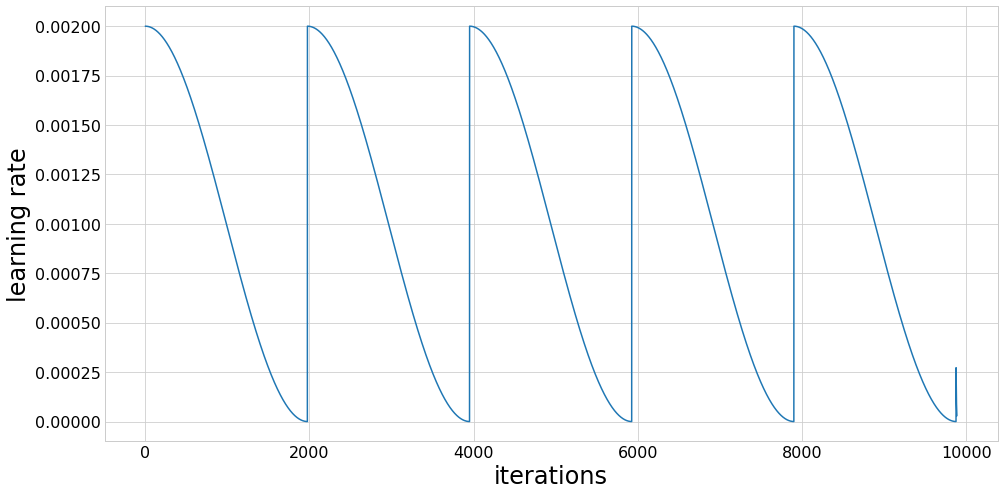

Fold took 109.987s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.300846). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150782). Check your callbacks.
  % delta_t_median)


1 New best found: 3.5849095053306136e-05
2 New best found: 3.418178102919229e-05
3 New best found: 3.3807769351528296e-05
4 New best found: 3.355095206957579e-05
5 New best found: 3.3462512353665834e-05
6 New best found: 3.3442798630678234e-05
7 New best found: 3.332432698616644e-05
8 New best found: 3.280310411976612e-05
11 New best found: 3.266665743682586e-05
12 New best found: 3.2602468378987536e-05
13 New best found: 3.2475139333550445e-05
16 New best found: 3.2388639026375254e-05
18 New best found: 3.2287295308714356e-05
19 New best found: 3.2179716751591196e-05
20 New best found: 3.217314617394002e-05
22 New best found: 3.21373871903278e-05
23 New best found: 3.2126638974518123e-05
Saving snapshot 1
38 New best found: 3.2125703747996274e-05
40 New best found: 3.212494717445406e-05
41 New best found: 3.203105003999695e-05
44 New best found: 3.1970947106988424e-05
45 New best found: 3.1948723446434e-05
46 New best found: 3.191573350504324e-05
47 New best found: 3.189356401978826e-

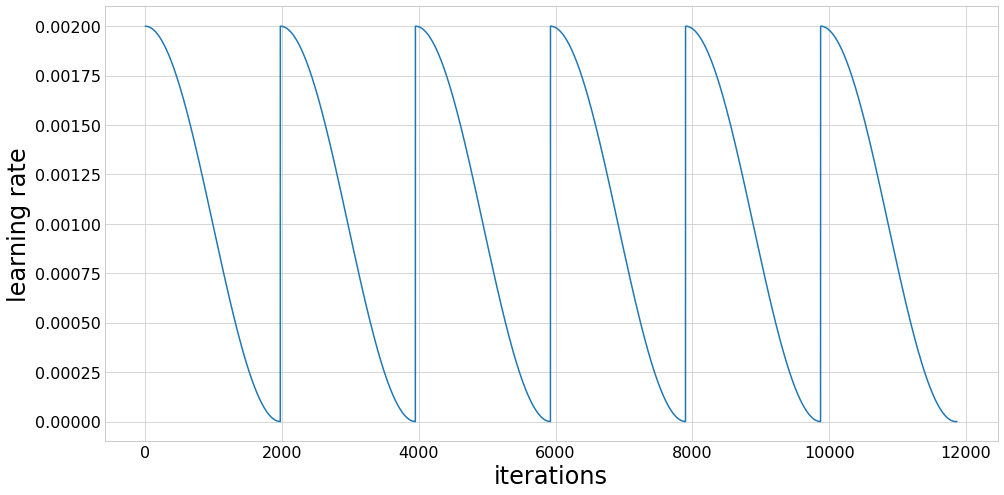

Fold took 140.666s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.303574). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152155). Check your callbacks.
  % delta_t_median)


1 New best found: 3.53672846274408e-05
2 New best found: 3.427545318142258e-05
4 New best found: 3.334341926461963e-05
5 New best found: 3.3101628049686903e-05
6 New best found: 3.3064348473981774e-05
7 New best found: 3.2728180565713405e-05
9 New best found: 3.258245588545412e-05
10 New best found: 3.2554227644951826e-05
11 New best found: 3.242980232329232e-05
12 New best found: 3.214919233954792e-05
15 New best found: 3.186215944300755e-05
16 New best found: 3.185098064002749e-05
21 New best found: 3.179282995243796e-05
23 New best found: 3.178999960356173e-05
Saving snapshot 1
25 New best found: 3.178538729202596e-05
38 New best found: 3.178338167088974e-05
39 New best found: 3.16950764228327e-05
42 New best found: 3.148423805877598e-05
43 New best found: 3.145412889154876e-05
Saving snapshot 2
68 New best found: 3.141404271960917e-05
69 New best found: 3.134374633680433e-05
70 New best found: 3.133215143256272e-05
72 New best found: 3.132439205989171e-05
Saving snapshot 3
98 New b

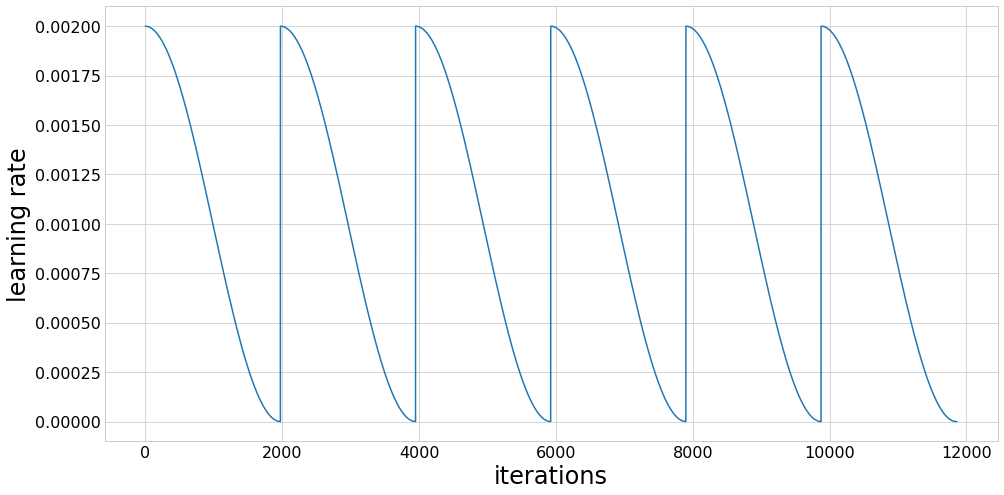

Fold took 136.605s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.342704). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171708). Check your callbacks.
  % delta_t_median)


1 New best found: 3.612524453414922e-05
2 New best found: 3.511389200696107e-05
3 New best found: 3.4169891793982835e-05
4 New best found: 3.341802383025521e-05
6 New best found: 3.298638003135979e-05
9 New best found: 3.264030264685343e-05
12 New best found: 3.242296268650991e-05
13 New best found: 3.237734948609149e-05
15 New best found: 3.2232016077735395e-05
16 New best found: 3.207684329981064e-05
19 New best found: 3.2042017943666954e-05
21 New best found: 3.203145562903927e-05
22 New best found: 3.1954791805928664e-05
23 New best found: 3.1944022426334496e-05
24 New best found: 3.1930215576185064e-05
Saving snapshot 1
25 New best found: 3.1928769899712264e-05
40 New best found: 3.183827994800217e-05
42 New best found: 3.178186085771118e-05
43 New best found: 3.1755027966818724e-05
44 New best found: 3.168824015910076e-05
45 New best found: 3.165106219272048e-05
46 New best found: 3.1575145105847234e-05
49 New best found: 3.1570206170742904e-05
Saving snapshot 2
50 New best found

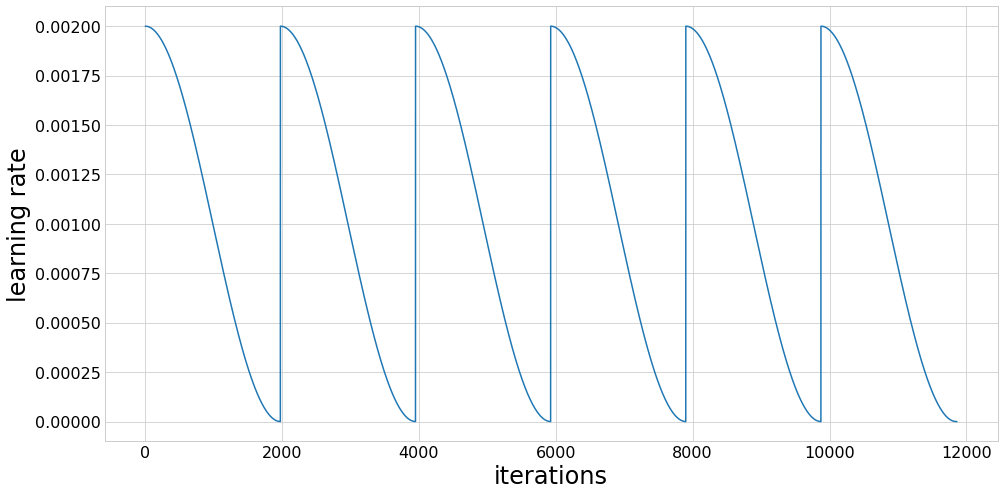

Fold took 140.885s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.374899). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187795). Check your callbacks.
  % delta_t_median)


1 New best found: 3.602361263474449e-05
3 New best found: 3.405986603756901e-05
4 New best found: 3.369939944532234e-05
5 New best found: 3.3330230257706715e-05
6 New best found: 3.318938965094276e-05
7 New best found: 3.301209056953667e-05
9 New best found: 3.280367990228115e-05
11 New best found: 3.24869257179671e-05
12 New best found: 3.236813581170281e-05
13 New best found: 3.230868845857913e-05
15 New best found: 3.2307215296168576e-05
16 New best found: 3.215488796122372e-05
18 New best found: 3.2017354200070256e-05
20 New best found: 3.1994523794855924e-05
21 New best found: 3.1958599342033266e-05
22 New best found: 3.19389619937283e-05
24 New best found: 3.1938656470447316e-05
Saving snapshot 1
25 New best found: 3.1938530896150045e-05
44 New best found: 3.188796688773436e-05
45 New best found: 3.179601557712885e-05
46 New best found: 3.17757414188236e-05
47 New best found: 3.1768279805692144e-05
48 New best found: 3.1759305874584245e-05
49 New best found: 3.175691819851636e-05

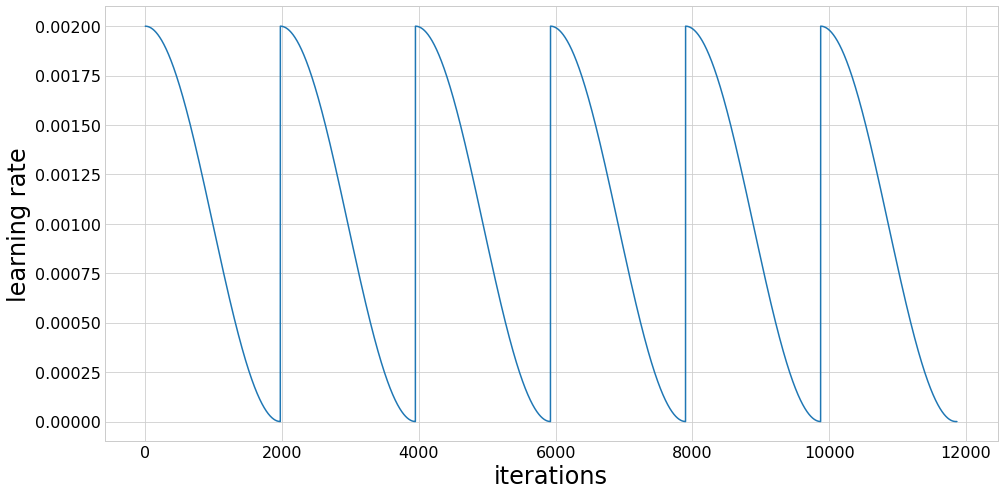

Fold took 146.954s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.396235). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198476). Check your callbacks.
  % delta_t_median)


1 New best found: 3.581965009361738e-05
2 New best found: 3.466239518093062e-05
3 New best found: 3.443228759497288e-05
4 New best found: 3.430793409061152e-05
6 New best found: 3.3322417979070453e-05
9 New best found: 3.311533722298918e-05
10 New best found: 3.301866140391212e-05
11 New best found: 3.26842879949254e-05
12 New best found: 3.2539017368981146e-05
15 New best found: 3.234839645156171e-05
16 New best found: 3.225569397036452e-05
18 New best found: 3.225252704723971e-05
19 New best found: 3.21763613683288e-05
20 New best found: 3.2069345710624476e-05
22 New best found: 3.203253083629534e-05
Saving snapshot 1
42 New best found: 3.195615604854538e-05
44 New best found: 3.189430066486239e-05
45 New best found: 3.188642882087152e-05
47 New best found: 3.184302035951987e-05
48 New best found: 3.1837313443247696e-05
49 New best found: 3.18250352582254e-05
Saving snapshot 2
50 New best found: 3.18240623397287e-05
Saving snapshot 3
98 New best found: 3.1813094756216743e-05
99 New b

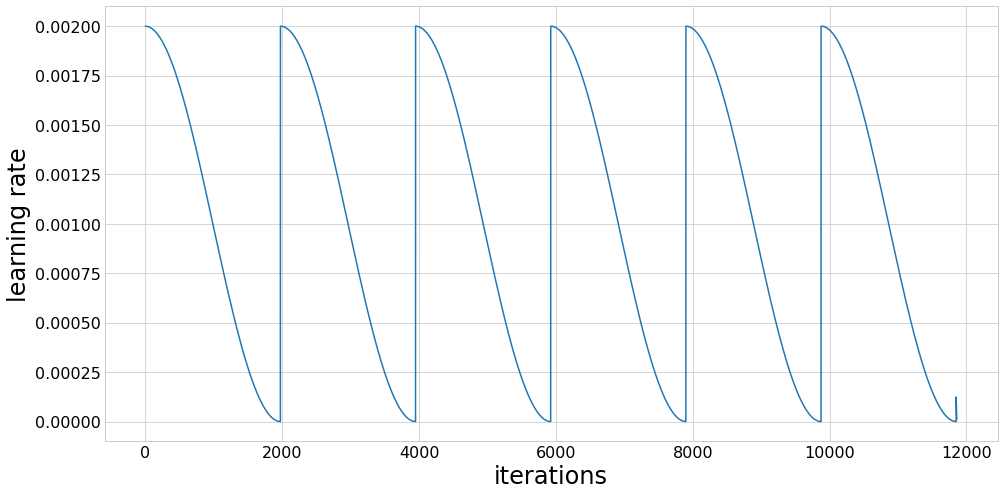

Fold took 146.087s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.438206). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219508). Check your callbacks.
  % delta_t_median)


1 New best found: 3.617882279213518e-05
2 New best found: 3.500558479281608e-05
3 New best found: 3.407518846652238e-05
5 New best found: 3.3599288803816306e-05
6 New best found: 3.338738116290188e-05
8 New best found: 3.306252489273902e-05
12 New best found: 3.281828201870667e-05
14 New best found: 3.2775322449742814e-05
15 New best found: 3.273023590008961e-05
18 New best found: 3.270742516760947e-05
20 New best found: 3.262333737584413e-05
22 New best found: 3.2543072679254694e-05
Saving snapshot 1
25 New best found: 3.2542317181651015e-05
38 New best found: 3.251550140266773e-05
47 New best found: 3.246856652840506e-05
48 New best found: 3.246693832625169e-05
49 New best found: 3.244027824548539e-05
Saving snapshot 2
69 New best found: 3.237568648037268e-05
70 New best found: 3.237231740349671e-05
Saving snapshot 3
Saving snapshot 4
CosineAnneal stalling after 100 epochs, entering redux decay at LR=0.0001919190160008334
103 New best found: 3.2368242027587254e-05
Early stopping afte

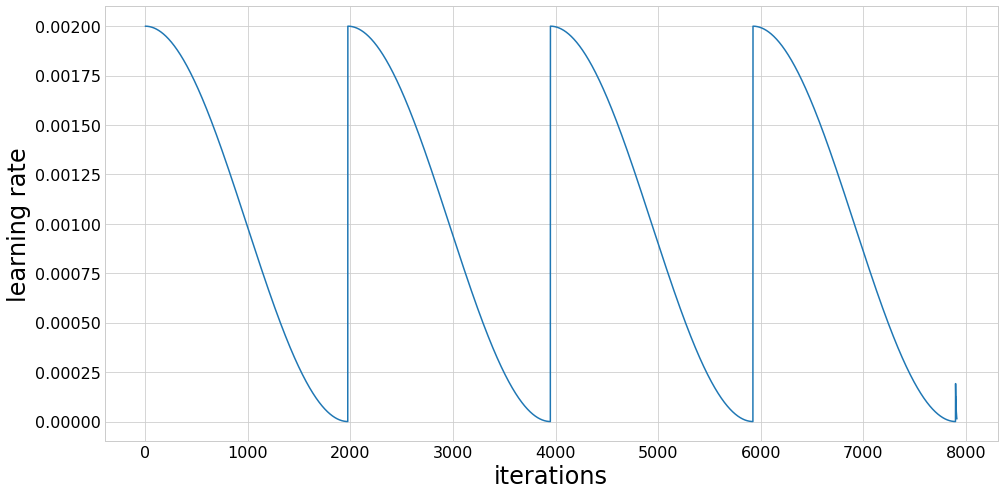

Fold took 105.582s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.473802). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237283). Check your callbacks.
  % delta_t_median)


1 New best found: 3.593656545563135e-05
2 New best found: 3.4910872227919756e-05
5 New best found: 3.386255807417911e-05
7 New best found: 3.373920121084666e-05
8 New best found: 3.3659837633604186e-05
9 New best found: 3.327794410288334e-05
10 New best found: 3.31411939492682e-05
14 New best found: 3.2930523014510984e-05
17 New best found: 3.280015230120625e-05
18 New best found: 3.2725891363224946e-05
19 New best found: 3.270356481807539e-05
Saving snapshot 1
41 New best found: 3.260398498387076e-05
44 New best found: 3.254455294445506e-05
46 New best found: 3.2493980188155545e-05
47 New best found: 3.244347517611459e-05
Saving snapshot 2
70 New best found: 3.241301510715857e-05
71 New best found: 3.241129257075954e-05
72 New best found: 3.2386105667683294e-05
73 New best found: 3.2373871771414995e-05
74 New best found: 3.235977285439731e-05
Saving snapshot 3
75 New best found: 3.2358812115126054e-05
Saving snapshot 4
Saving snapshot 5
CosineAnneal stalling after 125 epochs, entering

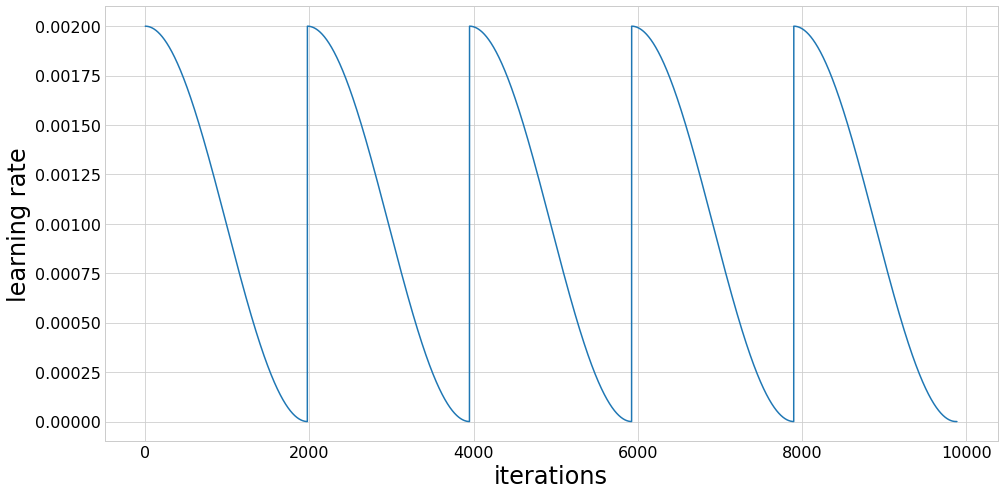

Fold took 128.831s


______________________________________
Training finished
Cross-validation took 1257.304s 


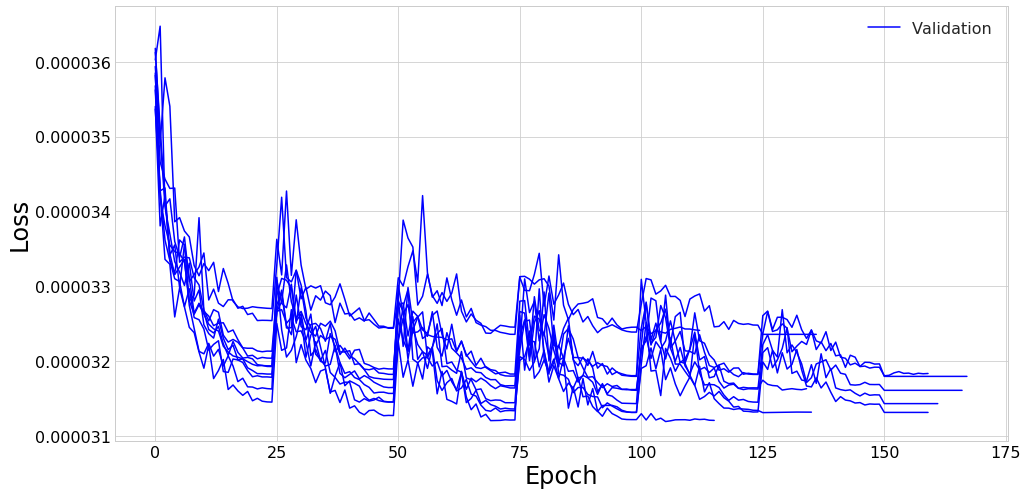

Mean loss = 3.17e-05 +- 1e-07
Mean wAUC = 0.0628 +- 0.0005
Mean AUC = 0.0979 +- 0.0007
Mean AMS = 3.94 +- 0.05
Mean cut = 0.97 +- 0.005
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
results, histories, cycle_losses = fold_train_model(train_fy, n_models,
                                                    model_gen_params=model_gen_params,
                                                    train_params=train_params, train_on_weights=True,
                                                    use_callbacks=use_callbacks, ams_args=ams_args,
                                                    max_epochs=max_epochs, patience=patience,
                                                    verbose=1, plots=plots)

## Construct ensemble

In [8]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)
with open('train_weights/cycle_file.pkl', 'rb') as fin:   
    cycle_losses = pickle.load(fin)

In [ ]:
ensemble, weights = assemble_ensemble(results, 10, ensemble_mode, compile_args, weighting='reciprocal')


In [12]:
def test_ensemble(size, n_cycles):
    ensemble, weights = assemble_ensemble(results, size, cycle_losses=cycle_losses, n_cycles=n_cycles, load_cycles_only=True, patience=patience, weighting='uniform')
    val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))
    fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=0)
    val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')
    ams, cut = ams_scan_slow(val_df_tta, br=10, w_factor=250000/50000)
    print(size, n_cycles, ams, cut)

In [13]:
%%capture --no-stdout
size = 10
for n_cycles in [0,1,2,3]:
    print('__________________________________')
    test_ensemble(size, n_cycles)
    print('__________________________________\n')

__________________________________
Choosing ensemble by loss
Model 0 is 1 with loss = 3.1194363514220014e-05
Model 1 is 0 with loss = 3.131359017590993e-05
Model 2 is 4 with loss = 3.131621887372556e-05
Model 3 is 5 with loss = 3.143370103670491e-05
Model 4 is 2 with loss = 3.156600304070642e-05
Model 5 is 6 with loss = 3.1611224263906476e-05
Model 6 is 7 with loss = 3.179336008470273e-05
Model 7 is 3 with loss = 3.1797430857570305e-05
Model 8 is 9 with loss = 3.235881194996182e-05
Model 9 is 8 with loss = 3.2368242027587254e-05
50000 candidates loaded
10 0 3.936606024307555 0.966548
__________________________________

__________________________________
Choosing ensemble by loss
Model 0 cycle 3 has loss = 3.1215098215430145e-05 and weight 1
Model 1 cycle 4 has loss = 3.131736119552378e-05 and weight 1
Model 2 cycle 5 has loss = 3.13230115630827e-05 and weight 1
Model 3 cycle 5 has loss = 3.1452733593087674e-05 and weight 1
Model 4 cycle 4 has loss = 3.162179165004137e-05 and weight 1
M

## Response on validation data without TTA

In [ ]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
val_df = convert_to_df(val_fy.source)

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

In [ ]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

In [ ]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

## Response on validation data with TTA

In [ ]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rot_mult=3, random_rot=True)

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class),
                                                           roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class, sample_weight=val_df_tta.gen_weight)))

In [ ]:
%%time
cut_kde_tta = kde_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

In [ ]:
%%time
cut_mean_tta = mean_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [ ]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde)

In [ ]:
score_test_data(test_fy.source, cut_mean)

# Test scoring - With TTA

In [ ]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), rot_mult=3, random_rot=True)

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde_tta, pred_name='pred_TTA')

In [ ]:
score_test_data(test_fy.source, cut_mean_tta, pred_name='pred_TTA')

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)